# WeatherPy


## Analysis:
    
#### As the latitude incredses or decreases, temperature decreases (City Latitude vs. Max Temperatute plot)   
#### There is a strong negative correlatiion between latutude and Max Temperature for Northern Hemisphere (The r-value is: -0.81)    
#### Cloudiness and the wind speed are spread across the latitude (City Latitude vs. Cloudiness and City Latitude vs. Wind Speed plot)  
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import json 
%matplotlib inline

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

cities[:5]

['busselton', 'mataura', 'shimoda', 'vaini', 'todos santos']

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units ="imperial"
city = "kapaa"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city

# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Get the temperature from the response
#print(f"The weather API responded with: {weather_json}.")

print(json.dumps(weather_json, indent=4, sort_keys=True))

        

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 22.08,
        "lon": -159.32
    },
    "dt": 1592248783,
    "id": 5848280,
    "main": {
        "feels_like": 79.43,
        "humidity": 69,
        "pressure": 1020,
        "temp": 79.68,
        "temp_max": 80.6,
        "temp_min": 79
    },
    "name": "Kapaa",
    "sys": {
        "country": "US",
        "id": 7873,
        "sunrise": 1592236420,
        "sunset": 1592284937,
        "type": 1
    },
    "timezone": -36000,
    "visibility": 16093,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 60,
        "speed": 12.75
    }
}


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# set up lists to hold reponse info
lat=[]
temp=[]
lon=[]
humidity=[]
cloudiness=[]
wind_speed=[]
city_names=[]
country=[]
date=[]

# Loop through the list of cities and perform a request for data on each
print(f"Beginning Data Retrieval")
print("-----------------------------")
record_count = 1
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp_max'])
        lon.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_names.append(city)   
    
        #time.sleep(1)
        
        print(f"Processing Record {record_count} | {city}") 
        record_count= record_count + 1
    except:
        print("City is not found.")
print("___________End of Retrieval_____________")

Beginning Data Retrieval
-----------------------------
Processing Record 1 | busselton
Processing Record 2 | mataura
Processing Record 3 | shimoda
Processing Record 4 | vaini
Processing Record 5 | todos santos
Processing Record 6 | punta arenas
City is not found.
Processing Record 7 | albany
Processing Record 8 | tamandare
Processing Record 9 | anadyr
Processing Record 10 | lagoa
Processing Record 11 | stillwater
Processing Record 12 | rikitea
Processing Record 13 | lompoc
Processing Record 14 | kavieng
Processing Record 15 | qaanaaq
City is not found.
Processing Record 16 | hermanus
Processing Record 17 | ushuaia
Processing Record 18 | hithadhoo
Processing Record 19 | yellowknife
Processing Record 20 | barrow
Processing Record 21 | butaritari
Processing Record 22 | bengkulu
Processing Record 23 | sobolevo
Processing Record 24 | berezovyy
Processing Record 25 | san quintin
Processing Record 26 | saldanha
Processing Record 27 | sitio novo do tocantins
Processing Record 28 | port elizabe

Processing Record 233 | tornio
Processing Record 234 | dingle
Processing Record 235 | qalyub
Processing Record 236 | beringovskiy
Processing Record 237 | ketchikan
Processing Record 238 | florianopolis
Processing Record 239 | mount isa
Processing Record 240 | vardo
Processing Record 241 | souillac
Processing Record 242 | rafsanjan
Processing Record 243 | mokhsogollokh
Processing Record 244 | richards bay
Processing Record 245 | thompson
Processing Record 246 | aden
Processing Record 247 | aksarka
Processing Record 248 | meulaboh
Processing Record 249 | vasto
Processing Record 250 | wewak
City is not found.
Processing Record 251 | muros
Processing Record 252 | pacific grove
Processing Record 253 | tura
Processing Record 254 | mahajanga
Processing Record 255 | hay river
Processing Record 256 | rawson
Processing Record 257 | dudinka
Processing Record 258 | kasamwa
Processing Record 259 | emba
Processing Record 260 | jinchang
Processing Record 261 | tshikapa
Processing Record 262 | buluang

Processing Record 472 | heinola
Processing Record 473 | amahai
Processing Record 474 | wuwei
Processing Record 475 | manggar
Processing Record 476 | hambantota
City is not found.
Processing Record 477 | itacarambi
Processing Record 478 | teya
Processing Record 479 | coahuayana
Processing Record 480 | maniitsoq
Processing Record 481 | iskateley
Processing Record 482 | daru
Processing Record 483 | anloga
Processing Record 484 | kangaatsiaq
City is not found.
Processing Record 485 | mendeleyevo
Processing Record 486 | dunedin
Processing Record 487 | bereslavka
Processing Record 488 | nome
Processing Record 489 | bibbiena
Processing Record 490 | lhokseumawe
Processing Record 491 | ingraj bazar
Processing Record 492 | chipinge
Processing Record 493 | antalaha
Processing Record 494 | letlhakane
City is not found.
Processing Record 495 | wagga wagga
Processing Record 496 | college
City is not found.
Processing Record 497 | kanel
Processing Record 498 | juegang
Processing Record 499 | sydney
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
main_df = pd.DataFrame(
    {"City": city_names,
     "Country": country,
     "Lat": lat,
     "Lng": lon,
     "Max Temperature (F)": temp,
     "Humidity (%)": humidity,
     "Cloudiness (%)": cloudiness,
     "Wind Speed (mph)": wind_speed,
     "Date(dt)": date
    })

main_df


,City,Country,Lat,Lng,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date(dt)
0,busselton,AU,-33.65,115.33,54.00,82,100,5.50,1592248796
1,mataura,NZ,-46.19,168.86,43.90,88,1,4.27,1592248796
2,shimoda,JP,34.67,138.95,66.00,91,100,2.35,1592248797
3,vaini,TO,-21.20,-175.20,69.80,73,20,10.29,1592248797
4,todos santos,MX,23.45,-110.22,72.00,79,0,5.99,1592248797
...,...,...,...,...,...,...,...,...,...
554,leshukonskoye,RU,64.90,45.76,61.00,60,100,5.86,1592248881
555,eyl,SO,7.98,49.82,84.97,56,19,21.16,1592248881
556,dhankuta,NP,26.98,87.33,71.82,87,100,1.92,1592248881
557,grand island,US,40.92,-98.34,93.20,24,1,23.04,1592248860


In [6]:
main_df.count()

City                   559
Country                559
Lat                    559
Lng                    559
Max Temperature (F)    559
Humidity (%)           559
Cloudiness (%)         559
Wind Speed (mph)       559
Date(dt)               559
dtype: int64

In [7]:
# Export the City_Data into a csv

main_df.to_csv("output_data/cities.csv", encoding="utf-8", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# #drop records with humidity over a hundred, new ref to data frame updated_df
# updated_df = main_df.loc[main_df["Cities"]["Humidity (%)"]]

main_df["Humidity (%)"].max()


100

In [9]:
# Get the indices of cities that have humidity over 100%.

hum_ind_df = main_df[main_df['Humidity (%)'] > 100].index
print(hum_ind_df)


Int64Index([], dtype='int64')


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data_df = main_df[main_df['Humidity (%)'] <= 100] 
clean_city_data_df


,City,Country,Lat,Lng,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date(dt)
0,busselton,AU,-33.65,115.33,54.00,82,100,5.50,1592248796
1,mataura,NZ,-46.19,168.86,43.90,88,1,4.27,1592248796
2,shimoda,JP,34.67,138.95,66.00,91,100,2.35,1592248797
3,vaini,TO,-21.20,-175.20,69.80,73,20,10.29,1592248797
4,todos santos,MX,23.45,-110.22,72.00,79,0,5.99,1592248797
...,...,...,...,...,...,...,...,...,...
554,leshukonskoye,RU,64.90,45.76,61.00,60,100,5.86,1592248881
555,eyl,SO,7.98,49.82,84.97,56,19,21.16,1592248881
556,dhankuta,NP,26.98,87.33,71.82,87,100,1.92,1592248881
557,grand island,US,40.92,-98.34,93.20,24,1,23.04,1592248860


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

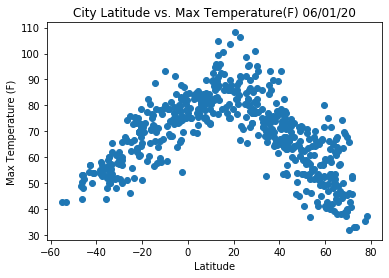

In [11]:
# Plot latitude versus temperature
x_values = main_df["Lat"]
y_values = main_df['Max Temperature (F)']
plt.scatter(x_values,y_values)
plt.title("City Latitude vs. Max Temperature(F) 06/01/20")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig("../Python_API/output_data/City Latitude vs. Max Temperature(F).png")
plt.show()


## Latitude vs. Humidity Plot

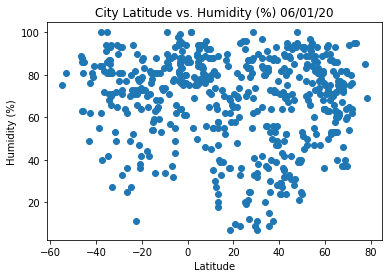

In [12]:
# Plot latitude versus humidity 
x_values = main_df["Lat"]
y_values = main_df['Humidity (%)']
plt.scatter(x_values,y_values)
plt.title("City Latitude vs. Humidity (%) 06/01/20")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.savefig("../Python_API/output_data/City Latitude vs. Humidity (%).png")
plt.show()

## Latitude vs. Cloudiness Plot

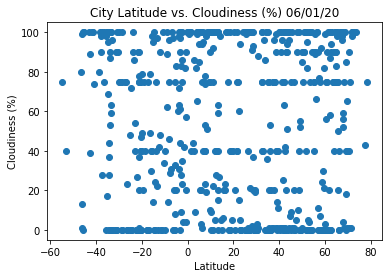

In [13]:
# Plot latitude versus cloudiness
x_values = main_df["Lat"]
y_values = main_df['Cloudiness (%)']
plt.scatter(x_values,y_values)
plt.title("City Latitude vs. Cloudiness (%) 06/01/20")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.savefig("../Python_API/output_data/City Latitude vs. Cloudiness (%).png")
plt.show()

## Latitude vs. Wind Speed Plot

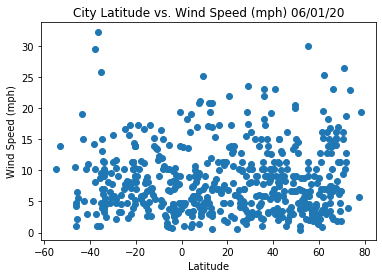

In [14]:
# Plot latitude versus wind speed plot
x_values = main_df["Lat"]
y_values = main_df['Wind Speed (mph)']
plt.scatter(x_values,y_values)
plt.title("City Latitude vs. Wind Speed (mph) 06/01/20")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.savefig("../Python_API/output_data/City Latitude vs. Wind Speed (mph).png")
plt.show()

## Linear Regression

In [15]:
# Create a function to create Linear Regression plots

def linearplot(x_values,y_values,y_label, coor):
    

    print(f"The r-value is: {round(st.pearsonr(x_values, y_values)[0],2)}")
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coor,fontsize=15,color="red")
 
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    
   
 


In [16]:
# Create Northern and Southern Hemisphere DataFrames
n_df= main_df.loc[main_df["Lat"]>= 0]

s_df= main_df.loc[main_df["Lat"]< 0]

n_df.head()

,City,Country,Lat,Lng,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date(dt)
2,shimoda,JP,34.67,138.95,66.00,91,100,2.35,1592248797
4,todos santos,MX,23.45,-110.22,72.00,79,0,5.99,1592248797
6,albany,US,42.60,-73.97,78.01,32,42,2.46,1592248797
8,anadyr,RU,64.75,177.48,44.01,80,100,7.47,1592248536
9,lagoa,PT,39.05,-27.98,64.58,87,14,19.28,1592248798


In [17]:
s_df.head()

,City,Country,Lat,Lng,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date(dt)
0,busselton,AU,-33.65,115.33,54.00,82,100,5.50,1592248796
1,mataura,NZ,-46.19,168.86,43.90,88,1,4.27,1592248796
3,vaini,TO,-21.20,-175.20,69.80,73,20,10.29,1592248797
5,punta arenas,CL,-53.15,-70.92,42.80,81,40,13.87,1592248670
7,tamandare,BR,-8.76,-35.10,78.51,85,14,11.99,1592248797


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.79


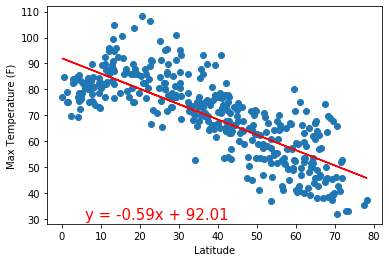

In [18]:
x_values= n_df["Lat"]
y_values= n_df["Max Temperature (F)"]
linearplot(x_values, y_values, "Max Temperature (F)", (6,30))


plt.savefig("../Python_API/output_data/Northern_City Lat vs. Max_Temp(F).png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.8


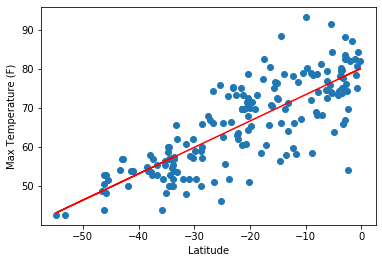

In [19]:
x_values= s_df["Lat"]
y_values= s_df["Max Temperature (F)"]
linearplot(x_values, y_values, "Max Temperature (F)", (-30,30))
plt.savefig("../Python_API/output_data/Southern_City Lat vs. Max_Temp(F).png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.01


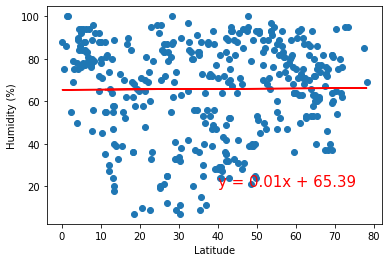

In [20]:
x_values= n_df["Lat"]
y_values= n_df["Humidity (%)"]
linearplot(x_values, y_values, "Humidity (%)", (40,20))
plt.savefig("../Python_API/output_data/Northern_City Lat vs. Humidity(%).png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.01


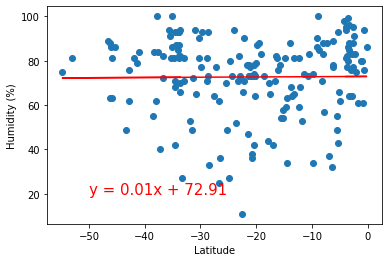

In [21]:
x_values= s_df["Lat"]
y_values= s_df["Humidity (%)"]
linearplot(x_values, y_values, "Humidity (%)", (-50,20))
plt.savefig("../Python_API/output_data/Southern_City Lat vs. Humidity(%).png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.01


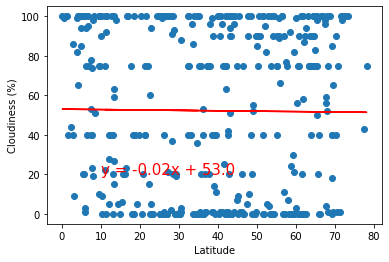

In [22]:
x_values= n_df["Lat"]
y_values= n_df["Cloudiness (%)"]
linearplot(x_values, y_values, "Cloudiness (%)", (10,20))
plt.savefig("../Python_API/output_data/Northern_City Lat vs. Cloudiness (mph).png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.08


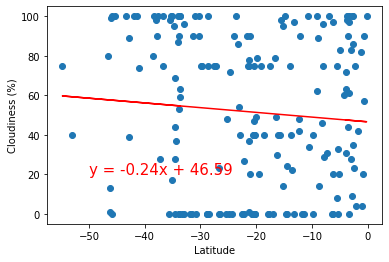

In [23]:
x_values=s_df["Lat"]
y_values= s_df["Cloudiness (%)"]
linearplot(x_values, y_values, "Cloudiness (%)", (-50,20))
plt.savefig("../Python_API/output_data/Southern_City Lat vs. Cloudiness (mph).png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.05


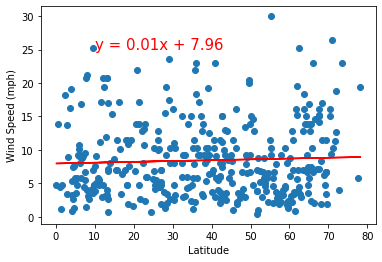

In [24]:
x_values= n_df["Lat"]
y_values= n_df["Wind Speed (mph)"]
linearplot(x_values, y_values, "Wind Speed (mph)", (10,25))
plt.savefig("../Python_API/output_data/Northern_City Lat vs. Wind Speed (mph).png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.13


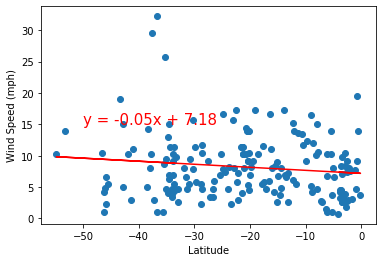

In [25]:
x_values= s_df["Lat"]
y_values= s_df["Wind Speed (mph)"]
linearplot(x_values, y_values, "Wind Speed (mph)", (-50,15))
plt.savefig("../Python_API/output_data/Southern_City Lat vs. Wind Speed (mph).png")
plt.show()